In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('project-3-ecommerce-data.csv')
df

,Unnamed: 0,Order_ID,Customer_Age,Gender,Product_Category,Order_Amount,Order_Date,Delivery_Status
0,0,25795,44,Male,Home & Kitchen,781.89,2024-01-21,Delivered
1,1,92386,38,Male,Home & Kitchen,867.51,2024-01-24,Delivered
2,2,74820,17,Female,Books,939.17,2024-01-02,Delivered
3,3,93104,27,Female,Beauty,437.63,2024-02-18,Delivered
4,4,94478,57,Female,Books,974.02,2024-01-15,Delivered
...,...,...,...,...,...,...,...,...
295,295,65826,51,Female,Clothing,811.43,2024-01-19,Delivered
296,296,78576,65,Male,Electronics,739.51,2024-02-02,Delivered
297,297,59104,37,Female,Beauty,645.55,2024-03-11,Delivered
298,298,67993,24,Female,Beauty,598.53,2024-01-25,Pending


### What is the average order amount for each product category?

In [3]:
df.groupby('Product_Category')['Order_Amount'].mean()

Product_Category
Beauty            522.172727
Books             486.885833
Clothing          498.169464
Electronics       469.090312
Home & Kitchen    539.169630
Name: Order_Amount, dtype: float64

### Which product category has the highest number of orders?

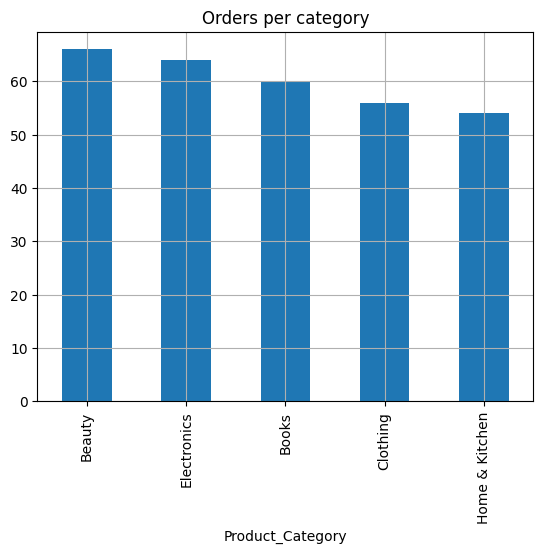

In [4]:
x = df['Product_Category'].value_counts()

x.plot(kind='bar', title="Orders per category")
plt.grid()

### How many orders were delivered, cancelled, or pending?

In [5]:
df['Delivery_Status'].value_counts()

Delivery_Status
Delivered    214
Cancelled     59
Pending       27
Name: count, dtype: int64

### What is the distribution of order amounts?

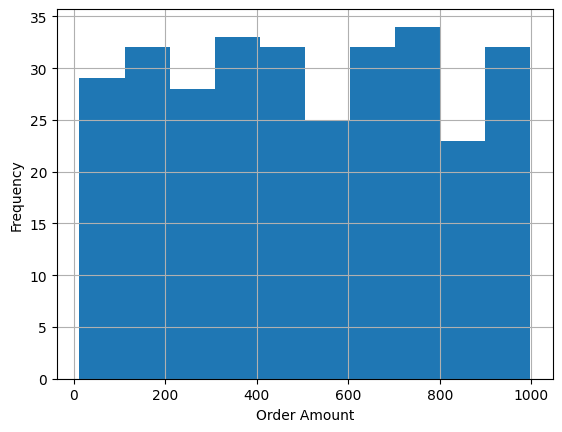

In [6]:
df['Order_Amount'].plot(kind="hist")
plt.xlabel('Order Amount')
plt.grid()

### Do males or females spend more on average per order?

In [7]:
df.groupby('Gender')['Order_Amount'].mean()

Gender
Female    480.396433
Male      526.494685
Name: Order_Amount, dtype: float64

### What is the trend of daily order volume over time?

Text(0, 0.5, 'number of orders')

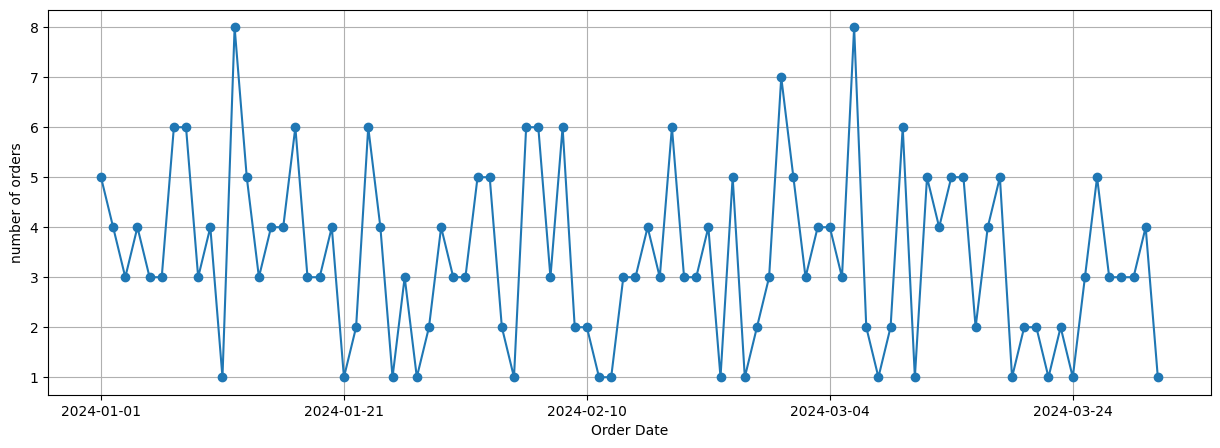

In [8]:
daily_orders = df.groupby("Order_Date").size()
daily_orders.plot(marker='o', figsize=(15, 5))
plt.grid()
plt.xlabel('Order Date')
plt.ylabel('number of orders')

### What’s the age distribution of customers in a histogram?

Text(0.5, 0, 'Age')

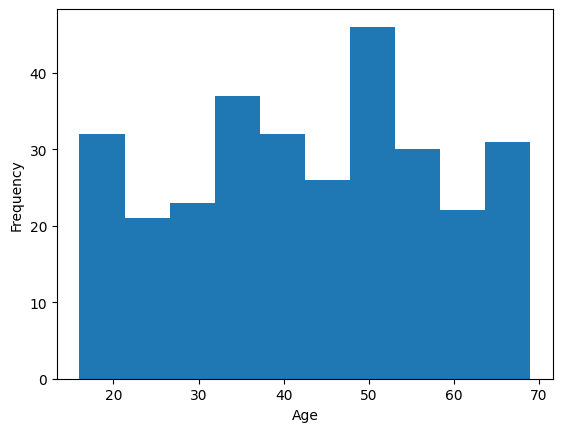

In [9]:
df['Customer_Age'].plot(kind='hist')
plt.xlabel('Age')

### Which age group (Teen, Adult, Senior) spends the most?

In [12]:
def age_group(age):
    if age < 20:
        return "teen"
    elif age < 50:
        return "Adult"
    else:
        return "Senior"


df['Age_Group'] = df['Customer_Age'].apply(age_group)

<Axes: xlabel='Age_Group'>

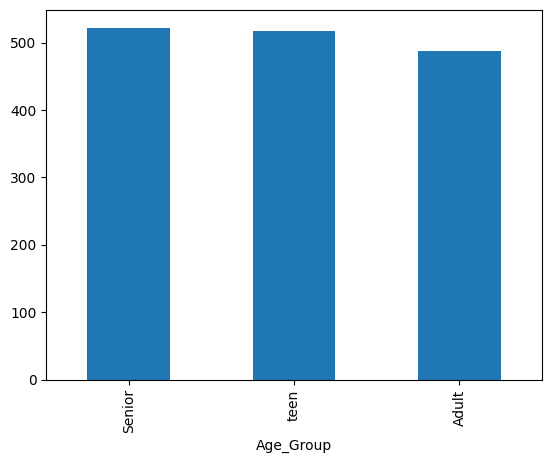

In [16]:
x = df.groupby('Age_Group')['Order_Amount'].mean().sort_values(ascending=False)

x.plot(kind='bar')

### Show a pie chart of order statuses by category.

### Which day of the week has the most orders?